<a href="https://colab.research.google.com/github/SIDIBEMoussa/LoanPrediction_Zindi_Competition/blob/main/Represention_de_Starter_Notebook_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Africa Credit Challenge

The goals of this `starter notebook` are:

1. How to load data into a `Pandas` dataframe

2. How to `train` a basic machine learning model

3. How to `evaluate` the model

4. How to `save` your __submission__ following the required format.

<font color="red"><b>Note: This is just a starter notebook. It is by no means an ideal solution.</b></font>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

os.chdir("/content/drive/MyDrive/Data_Zindi_Loan/")

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import StandardScaler
#from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [4]:
train_data = pd.read_csv('train_final.csv')
test_data = pd.read_csv('test_final.csv')

In [5]:
#train_data["Central Bank Rate Change"] = train_data["Central Bank Rate Change"].astype(float)
#test_data["Central Bank Rate Change"] = test_data["Central Bank Rate Change"].astype(float)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68654 entries, 0 to 68653
Data columns (total 60 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   Total_Amount                                                            68654 non-null  float64
 1   Total_Amount_to_Repay                                                   68654 non-null  float64
 2   duration                                                                68654 non-null  int64  
 3   Amount_Funded_By_Lender                                                 68654 non-null  float64
 4   Lender_portion_Funded                                                   68654 non-null  float64
 5   Lender_portion_to_be_repaid                                             68654 non-null  float64
 6   year                                                                    68654 

In [7]:
correlation = train_data.corr()
correlation

,Total_Amount,Total_Amount_to_Repay,duration,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,year,month,day,day_of_week,...,hidden_state_day_of_week,hidden_state_quarter,"hidden_state_Inflation, consumer prices (annual %)","hidden_state_Official exchange rate (LCU per US$, period average)",hidden_state_Real interest rate (%),hidden_state_Deposit interest rate (%),hidden_state_Lending interest rate (%),"hidden_state_Interest rate spread (lending rate minus deposit rate, %)",hidden_state_Unemployment rate,target
Total_Amount,1.000000,0.996759,0.354523,0.420987,-0.038000,0.426856,0.039197,-0.045442,-0.013807,-0.002421,...,0.003673,0.026045,0.068673,-0.063721,0.068673,-0.069542,0.068843,0.068673,0.069542,0.086043
Total_Amount_to_Repay,0.996759,1.000000,0.371108,0.410123,-0.036009,0.418614,0.036893,-0.042666,-0.011622,-0.002526,...,0.004092,0.025493,0.064137,-0.059908,0.064137,-0.065293,0.064284,0.064137,0.065293,0.087089
duration,0.354523,0.371108,1.000000,0.364851,-0.019972,0.394855,0.127734,-0.123320,-0.028572,-0.014042,...,0.009994,0.072536,0.187521,-0.200421,0.187521,-0.218432,0.181885,0.187521,0.218432,0.189889
Amount_Funded_By_Lender,0.420987,0.410123,0.364851,1.000000,0.093573,0.997542,0.067804,-0.088093,-0.018813,-0.007789,...,0.003439,0.030124,0.097477,-0.098843,0.097477,-0.114985,0.094859,0.097477,0.114985,0.101845
Lender_portion_Funded,-0.038000,-0.036009,-0.019972,0.093573,1.000000,0.085730,-0.029280,-0.205753,0.045746,-0.067474,...,0.009462,0.001207,0.007494,0.012057,0.007494,0.014533,-0.017850,0.007494,-0.014533,0.045418
Lender_portion_to_be_repaid,0.426856,0.418614,0.394855,0.997542,0.085730,1.000000,0.067684,-0.082307,-0.017702,-0.007685,...,0.003535,0.030135,0.095832,-0.098454,0.095832,-0.114251,0.093256,0.095832,0.114251,0.109517
year,0.039197,0.036893,0.127734,0.067804,-0.029280,0.067684,1.000000,-0.102435,-0.037402,-0.004152,...,0.000725,0.040184,-0.631338,-0.725504,-0.631338,-0.952243,-0.619713,-0.631338,0.952243,0.129514
month,-0.045442,-0.042666,-0.123320,-0.088093,-0.205753,-0.082307,-0.102435,1.000000,-0.161448,-0.014316,...,-0.000175,-0.089076,-0.059839,0.116593,-0.059839,0.136053,-0.067120,-0.059839,-0.136053,-0.068877
day,-0.013807,-0.011622,-0.028572,-0.018813,0.045746,-0.017702,-0.037402,-0.161448,1.000000,0.026545,...,-0.000108,-0.027378,-0.020057,0.041121,-0.020057,0.050955,-0.019952,-0.020057,-0.050955,-0.023561
day_of_week,-0.002421,-0.002526,-0.014042,-0.007789,-0.067474,-0.007685,-0.004152,-0.014316,0.026545,1.000000,...,-0.062398,-0.007673,-0.009336,0.011327,-0.009336,0.008728,-0.008398,-0.009336,-0.008728,-0.009166


In [8]:
train_data.shape,test_data.shape

((68654, 60), (18594, 60))

In [9]:
X = train_data.drop(['target'], axis=1)
y = train_data['target']

In [10]:
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.decomposition import PCA

In [14]:
scaler = StandardScaler()

X_scaled=StandardScaler().fit_transform(X)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

<Axes: title={'center': 'Distribution des caractéristiques'}>

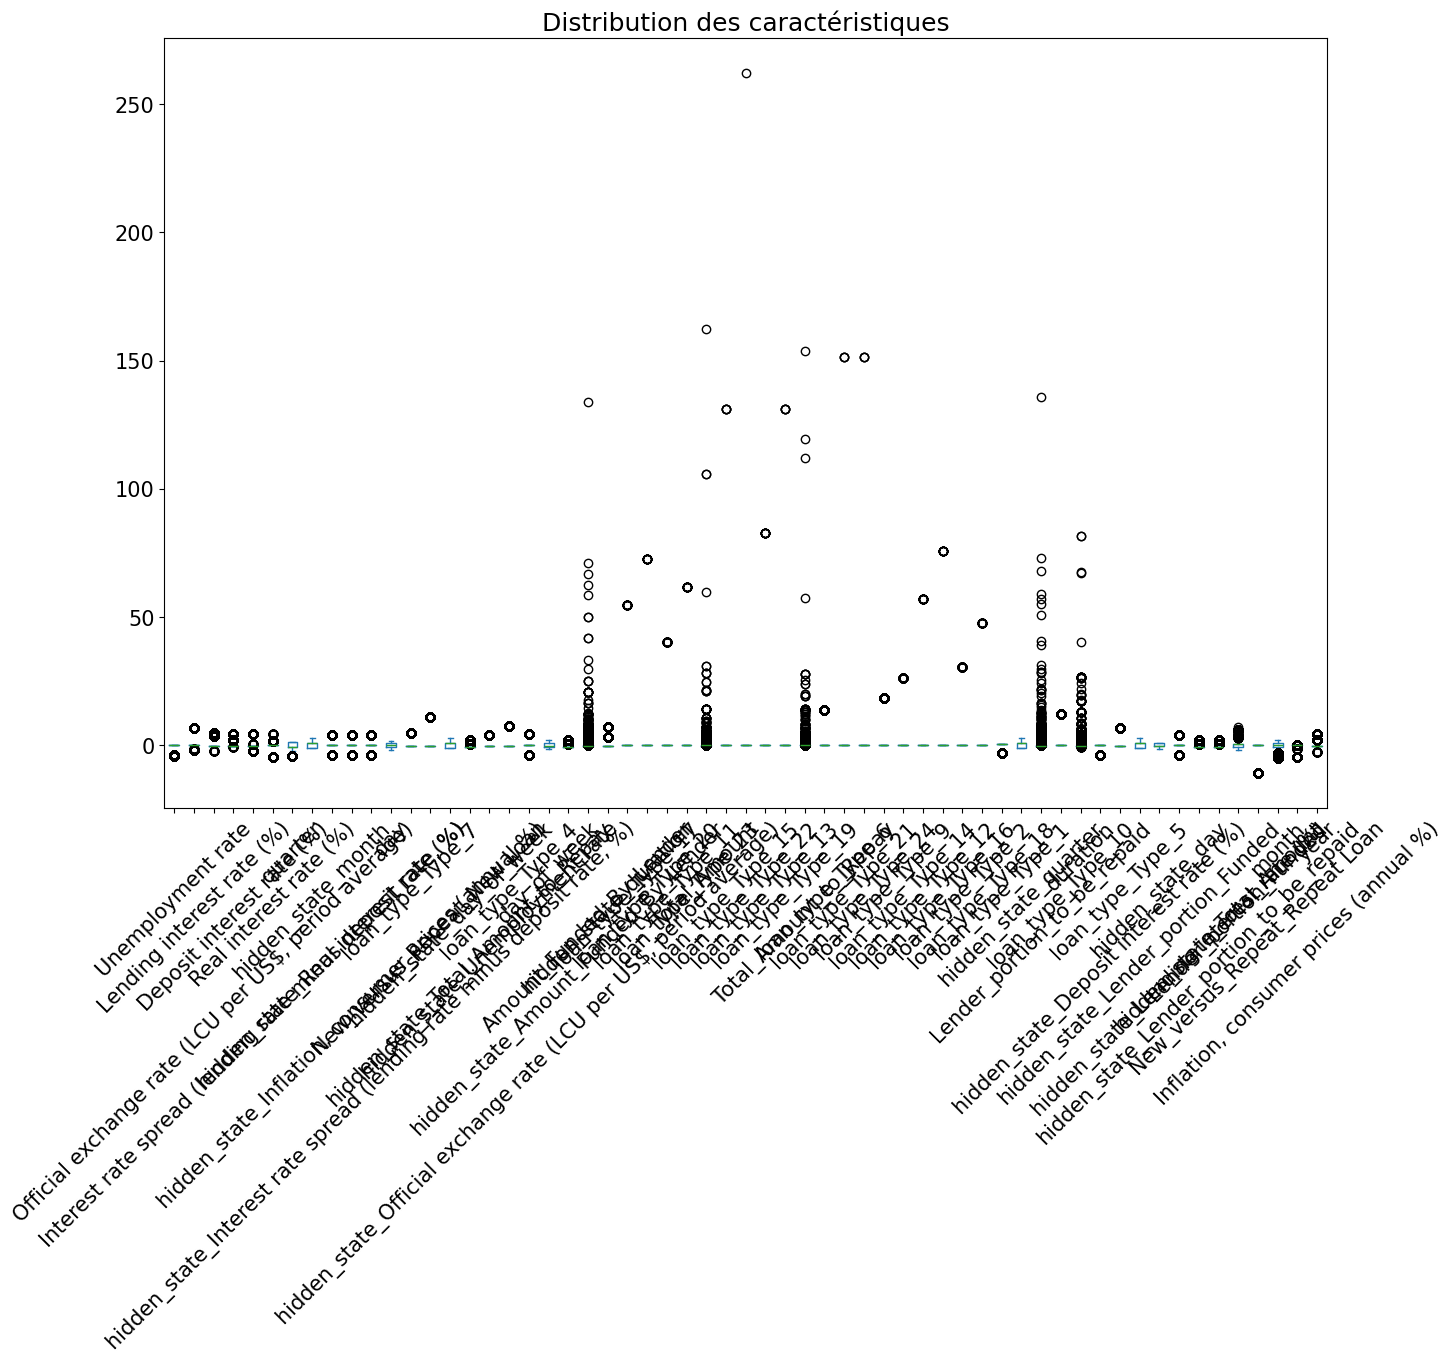

In [16]:
plt.rcParams.update({"font.size":15})
X_scaled=pd.DataFrame(X_scaled,columns=X.columns,index=X.index)
sorted_by_mean=X_scaled.mean().sort_values(ascending=True)
X_scaled[sorted_by_mean.index].plot(kind="box", figsize=(15,10),rot=45,title="Distribution des caractéristiques")

In [17]:
pca=PCA()
X_pca=pca.fit_transform(X_train)

In [18]:
col=["F"+str(i) for i in range(1,X_pca.shape[1]+1)]
X_pca=pd.DataFrame(X_pca,columns=col)

In [19]:
X_pca.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F50,F51,F52,F53,F54,F55,F56,F57,F58,F59
0,0.729095,-0.783541,-0.188680,-1.376972,0.818804,-1.007612,-0.061293,0.282862,0.884423,0.042298,...,1.866408e-15,1.489290e-15,8.752452e-18,5.230451e-17,6.203078e-16,1.031590e-15,2.251570e-15,3.376966e-15,-4.528287e-15,-1.501477e-15
1,0.880970,-0.590661,-0.163270,-0.460091,-0.828795,0.363738,-0.613533,0.059527,-1.076325,0.283773,...,-2.949185e-15,-2.549146e-15,5.916195e-16,4.963937e-16,-1.169927e-15,1.295341e-16,-1.023588e-15,-3.131716e-15,2.618774e-15,3.494527e-15
2,0.807328,-1.189468,0.000658,-1.790378,1.345615,-0.688870,1.118501,0.259926,0.599515,-0.157363,...,4.558699e-15,6.679583e-15,-5.153785e-15,-1.092613e-15,2.216253e-15,-2.451662e-16,5.165905e-15,7.387647e-15,-8.511212e-15,-1.414535e-16
3,0.969958,-1.049204,0.044971,-0.848803,-0.278106,0.884358,0.620489,-0.008141,-0.721659,-0.098680,...,1.547219e-15,2.655024e-15,-3.238650e-15,2.882269e-16,3.843854e-16,-1.369267e-15,1.280125e-15,-1.050048e-15,-8.923061e-16,4.410461e-15
4,-16.343555,-2.137957,-0.041521,-1.303541,0.553458,0.651197,0.364996,-0.116903,-1.018102,0.074458,...,1.676359e-14,5.235173e-15,6.622513e-15,2.750239e-15,-9.386465e-15,2.266974e-15,1.584476e-15,-2.297189e-14,-7.933756e-15,-4.280682e-15


In [20]:
eigen_values=pca.explained_variance_ratio_
explained_variance=pd.Series(dict(zip(X_pca.columns,100.0*pca.explained_variance_ratio_)))

<Axes: title={'center': 'Inertie expliquée par axe factoriel'}>

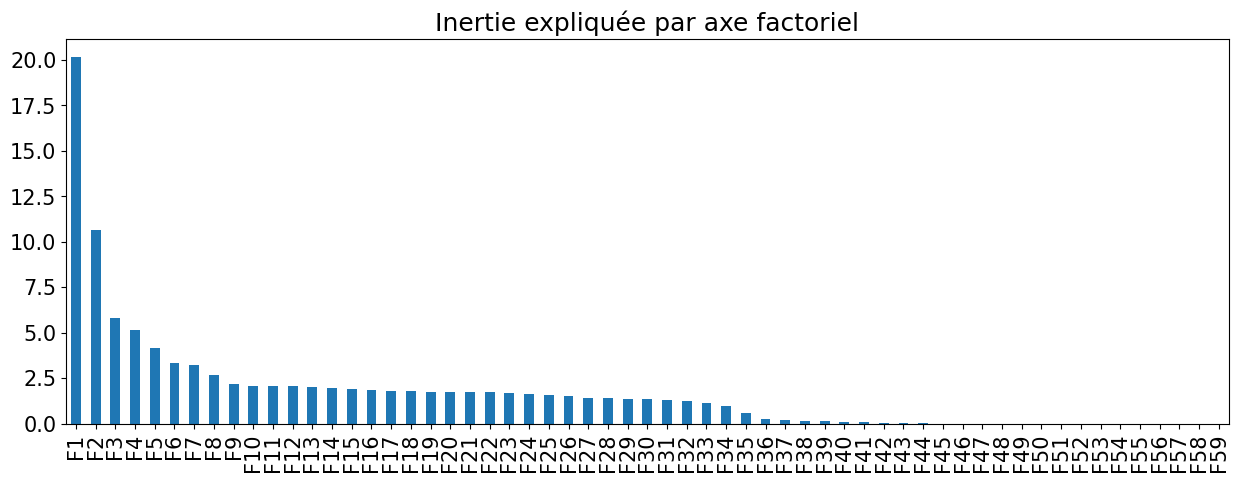

In [21]:
explained_variance.plot(kind="bar",title="Inertie expliquée par axe factoriel",figsize=(15,5))

In [22]:
explained_variance["F1"]+explained_variance["F2"]+explained_variance["F3"]

36.638571130624186

In [23]:
dict_colors={1:"red", 0:"green"}
y_colors=[dict_colors[yi] for yi in y_train]

<Axes: title={'center': 'Projection des individus sur le 1er plan factoriel'}, xlabel='F1', ylabel='F2'>

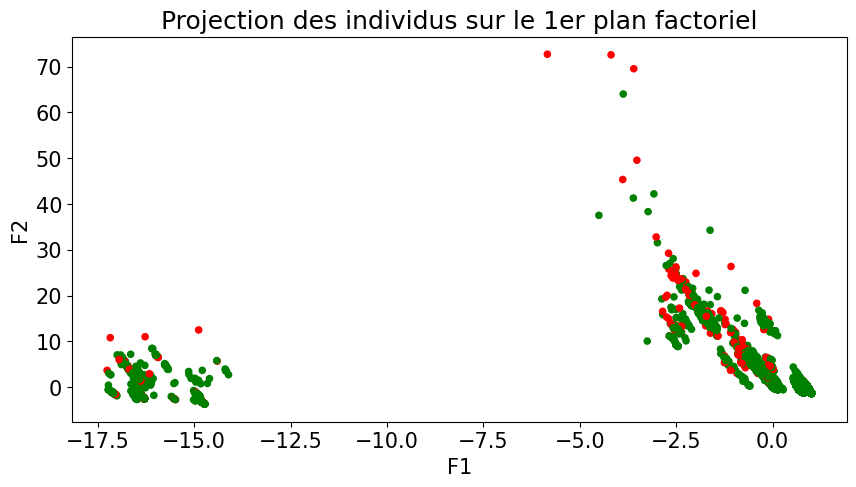

In [24]:
X_pca.plot(kind="scatter",x="F1",y="F2",figsize=(10,5),title="Projection des individus sur le 1er plan factoriel",color=y_colors)

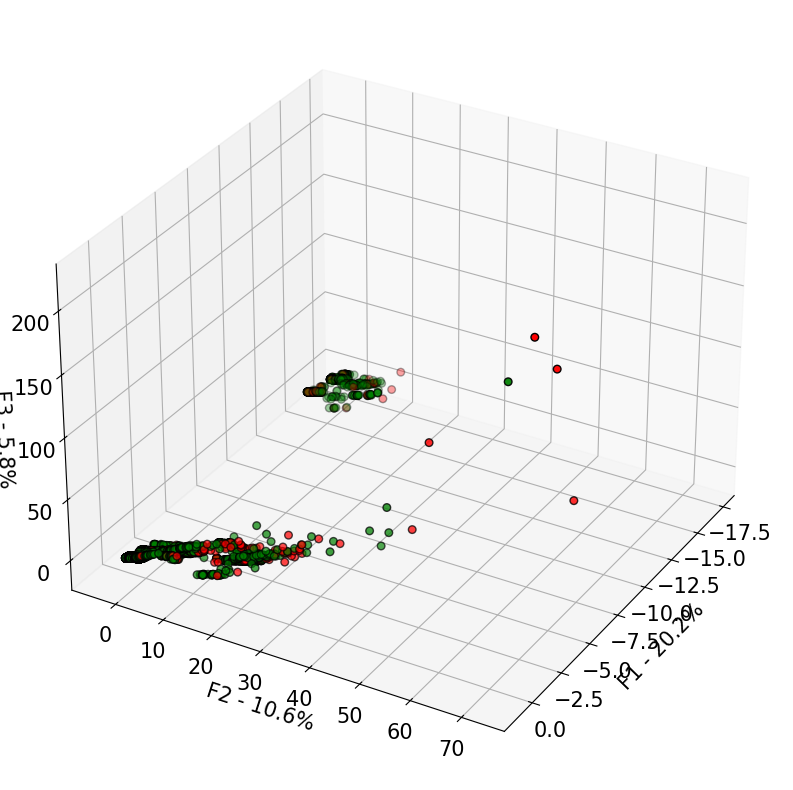

In [25]:
fig=plt.figure(figsize=(15,10))
ax=fig.add_subplot(projection="3d")
ax.scatter(X_pca['F1'], X_pca['F2'], X_pca['F3'], marker='o', s=30, edgecolor='k', facecolor=y_colors)
ax.set_xlabel('F1 - ' + '{:.1f}%'.format(explained_variance['F1']))
ax.set_ylabel('F2 - ' + '{:.1f}%'.format(explained_variance['F2']))
ax.set_zlabel('F3 - ' + '{:.1f}%'.format(explained_variance['F3']))
ax.view_init(elev=30, azim=30)

In [26]:
from sklearn.manifold import TSNE

In [27]:
tsne=TSNE(n_components=3,init="pca",random_state=1, n_jobs=-1)

In [28]:
X_tsne=tsne.fit_transform(X_train)


In [30]:
#X_tsne_test=tsne.tr

In [31]:
cols=["DIM"+str(c) for c in range(1,X_tsne.shape[1]+1)]
X_tsne=pd.DataFrame(X_tsne, columns=cols)
#X_tsne_test=pd.DataFrame(X_tsne_test, columns=cols)

X_tsne["target"]=y_train.values
#X_tsne_test["target"]=y_test.values

X_tsne.head()

,DIM1,DIM2,DIM3,target
0,-20.885382,-14.216354,-34.211651,0
1,9.090316,23.414799,-23.648249,0
2,-19.865629,-16.071817,28.900578,0
3,7.153961,-28.635317,7.222971,0
4,-34.311962,-9.495335,5.188582,0


In [33]:
X_tsne.to_csv("X_tsne.csv",index=False)

<Axes: xlabel='DIM1', ylabel='DIM2'>

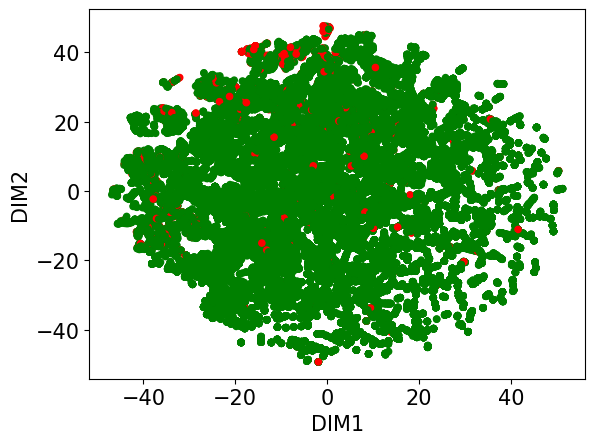

In [34]:
X_tsne.plot(kind="scatter",x="DIM1",y="DIM2",color=y_colors)

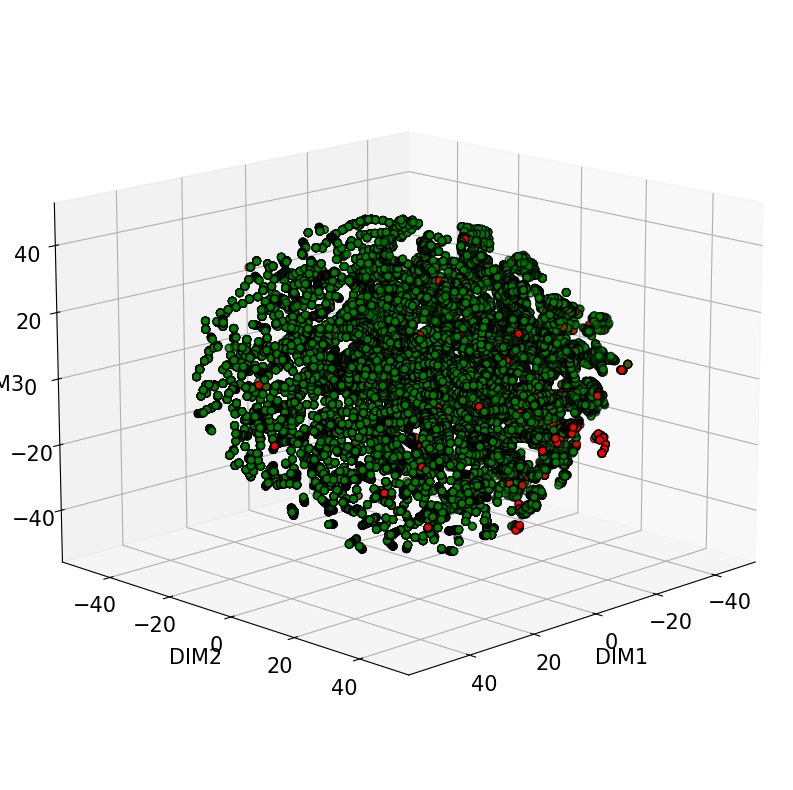

In [35]:
fig=plt.figure(figsize=(15,10))
ax=fig.add_subplot(projection="3d")
ax.scatter(X_tsne['DIM1'], X_tsne['DIM2'], X_tsne['DIM3'], marker='o', s=30, edgecolor='k', facecolor=y_colors)
ax.set_xlabel('DIM1')
ax.set_ylabel('DIM2')
ax.set_zlabel('DIM3')
ax.view_init(elev=15, azim=45)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split

# Supposons que vous ayez déjà vos données X_train et X_test
# Charger vos données (si ce n'est pas déjà fait)
train_data = pd.read_csv('train_final.csv')
test_data = pd.read_csv('test_final.csv')

# Préparer les données (si ce n'est pas déjà fait)
train_data["Central Bank Rate Change"] = train_data["Central Bank Rate Change"].astype(float)
test_data["Central Bank Rate Change"] = test_data["Central Bank Rate Change"].astype(float)

In [ ]:
test_data = test_data.drop(['ID'], axis=1)

In [ ]:
X = train_data.drop(['target'], axis=1)
y = train_data['target']

X_scaled = StandardScaler().fit_transform(X)
test_data_scaled = StandardScaler().fit_transform(test_data)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 1. Combiner les données d'entraînement et de test
X_combined = np.vstack((X_train, X_test,test_data_scaled))
size_train = X_train.shape[0]
size_test = X_test.shape[0]
size_test_data = test_data_scaled.shape[0]

In [ ]:
# 2. Appliquer t-SNE aux données combinées
tsne = TSNE(n_components=3, init="pca", random_state=1, n_jobs=-1)
X_tsne_combined = tsne.fit_transform(X_combined)

In [ ]:
# 3. Diviser le résultat t-SNE en données d'entraînement et de test
X_tsne_train = X_tsne_combined[:size_train, :]
X_tsne_test = X_tsne_combined[size_train:size_train+size_test, :]
test__tsne_data = X_tsne_combined[size_train+size_test:, :]

In [ ]:
# Convertir en DataFrame si nécessaire
cols = ["DIM" + str(c) for c in range(1, X_tsne_train.shape[1] + 1)]
X_tsne_train = pd.DataFrame(X_tsne_train, columns=cols)
X_tsne_train["y"] = y_train.values
X_tsne_test = pd.DataFrame(X_tsne_test, columns=cols)
X_tsne_test["y"] = y_test.values
test__tsne_data = pd.DataFrame(test__tsne_data, columns=cols)

In [ ]:
# Enregistrer les données si nécessaire
X_tsne_train.to_csv("./Reduced/X_tsne_train.csv", index=False)
X_tsne_test.to_csv("./Reduced/X_tsne_test.csv", index=False)
test__tsne_data.to_csv("./Reduced/test__tsne_data.csv", index=False)

In [ ]:
train_path = "./Reduced/X_tsne_train.csv"
test_path = "./Reduced/X_tsne_test.csv"
test__tsne_data_path = "./Reduced/test__tsne_data.csv"

In [ ]:
train_tsne_load = pd.read_csv(train_path)
X_train, y_train = train_tsne_load.drop("y",axis=1),train_tsne_load["y"]

test_tsne_load = pd.read_csv(test_path)
X_test, y_test = test_tsne_load.drop("y",axis=1),test_tsne_load["y"]

test__tsne_data = pd.read_csv(test__tsne_data_path)

In [ ]:
y_test.isna().sum()

0

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape,test__tsne_data.shape

((54923, 3), (54923,), (13731, 3), (13731,), (18594, 3))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [ ]:
# Définir les paramètres
params = {
    'objective': 'multi:softmax', # Pour classification multi-classes
    'num_class': 3,              # Nombre de classes
    'max_depth': 4,              # Profondeur maximale de l'arbre
    'eta': 0.3,                  # Taux d'apprentissage
    'seed': 42
}



# Entraîner le modèle
model = xgb.train(params, dtrain, num_boost_round=100)

In [ ]:
y_pred = model.predict(dtest)

# Évaluer la précision
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     13487
           1       0.60      0.11      0.19       244

    accuracy                           0.98     13731
   macro avg       0.79      0.55      0.59     13731
weighted avg       0.98      0.98      0.98     13731



In [ ]:
import xgboost as xgb
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import roc_auc_score, classification_report
from numpy import mean
import pandas as pd
from collections import Counter
class_dist = Counter(y_train)
scale_pos_weight = class_dist[0] / class_dist[1]

# Assuming X_train and y_train are your training data and labels
# X_valid and y_valid are your validation set

# Initialize the XGBoost classifier
model = xgb.XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    objective='binary:logistic',  # Specify the objective for binary classification
    eval_metric='auc',
    use_label_encoder=False  # Avoid warning
)

# Define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Convert data to DMatrix
#dtrain = xgb.DMatrix(X_train, label=y_train)

# Evaluate the model using cross-validation
scores = []
models = []  # to save each model
for train_index, test_index in cv.split(X_train, y_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]

    class_dist = Counter(y_train_cv)
    scale_pos_weight = class_dist[0] / class_dist[1]
    model_cv = xgb.XGBClassifier(
        scale_pos_weight=scale_pos_weight,
        objective='binary:logistic',  # Specify the objective for binary classification
        eval_metric='auc',
        use_label_encoder=False  # Avoid warning
    )
    model_cv.fit(X_train_cv, y_train_cv)
    models.append(model_cv)

    y_pred_proba = model_cv.predict_proba(X_test_cv)[:, 1]
    scores.append(roc_auc_score(y_test_cv, y_pred_proba))

# Summarize performance
print('Mean ROC AUC: %.5f' % mean(scores))

Mean ROC AUC: 0.79334
